    fft_0_b   fft_1_b   fft_2_b   fft_3_b   fft_4_b   fft_5_b   fft_6_b  \
0  0.514594 -0.919833 -0.573258 -0.497477 -0.579201  0.340478 -0.174609   
1  0.390102  0.034865 -0.741566  2.751967 -0.801672  0.584105  0.174250   
2  0.459085 -0.046854 -0.771849 -1.772891 -0.410197  0.316622 -0.578480   
3 -0.787360 -0.160431  0.007168 -1.344962  0.523339 -1.217657 -2.395455   
4  0.689726 -0.244747  1.238647 -0.566144  0.777189  0.471321  0.294202   

    fft_7_b   fft_8_b   fft_9_b  ...  fft_741_b  fft_742_b  fft_743_b  \
0  0.788175  0.148745  1.651967  ...   0.488628  -0.226006  -1.225098   
1 -1.457582 -0.453662 -1.200081  ...  -1.465980   0.954223  -0.888089   
2 -0.033582  0.247820 -1.016940  ...  -0.407972  -0.089659   0.600283   
3 -0.573321 -1.491792 -0.285894  ...   0.308509   2.305654   1.687370   
4 -0.724660 -0.993683 -1.113371  ...   0.357411   0.075574   0.651720   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b  label  
0   0.222564   0.089179  -0.74247

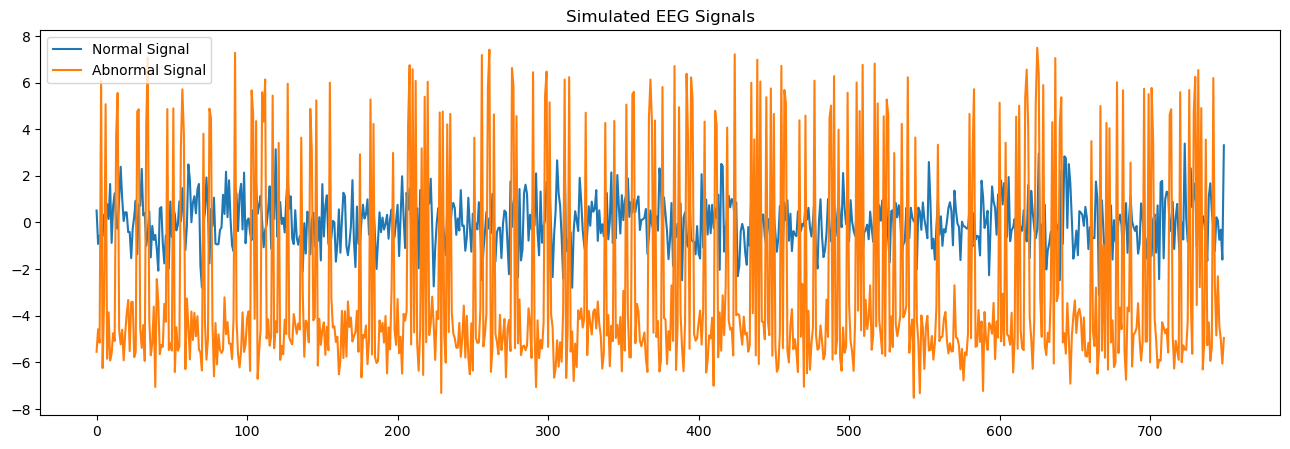

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 750)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 750, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 256)                 │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,169 (778.00 KB)

 Trainable params: 199,169 (778.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 957ms/step - accuracy: 0.7911 - loss: 0.4441 - val_accuracy: 0.9643 - val_loss: 0.4487
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9829 - loss: 0.1905 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 971ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 967ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 7.2182e-04
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 960ms/step - accuracy: 1.0000 - loss: 6.5270e-04 - val_accuracy: 1.0000 - val_loss: 4.2088e-04
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 942ms/step - accuracy: 0.9979 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 9.0657e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 904ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 6.5028e-04
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 968ms/step - accuracy: 1.0000 - l

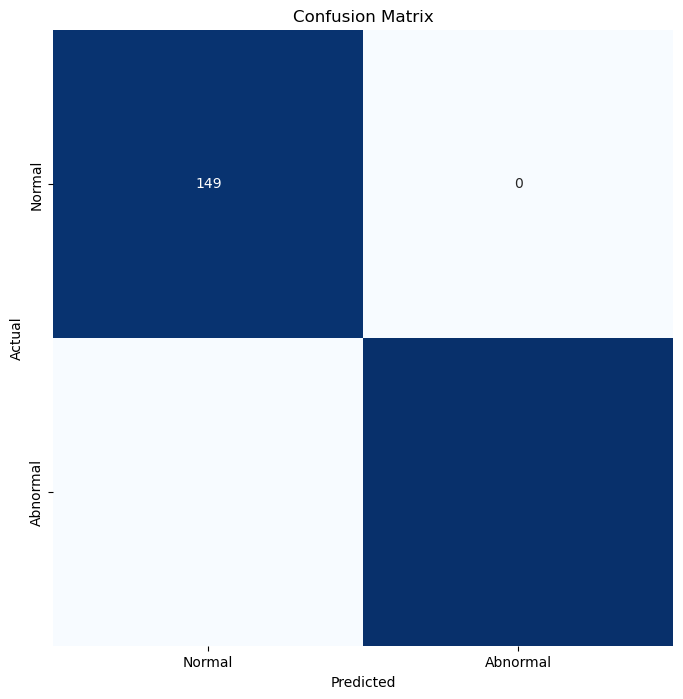

Classification Report:
-----------------------
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       149
    Abnormal       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

def simulate_eeg_data(samples=1000, features=750):
    """
    Simulate synthetic EEG data for normal and abnormal brain activity.
    :param samples: Total number of data points
    :param features: Number of FFT features per sample
    :return: DataFrame with simulated EEG data and labels
    """
    normal_data = np.random.normal(0, 1, size=(samples // 2, features))  
    abnormal_data = np.random.normal(0, 1, size=(samples // 2, features))
    
    # Introduce abnormalities: Higher amplitudes or spikes
    abnormal_data += np.random.choice([5, -5], size=(samples // 2, features), p=[0.2, 0.8])
    
    data = np.vstack([normal_data, abnormal_data])
    labels = np.array([0] * (samples // 2) + [1] * (samples // 2))  
    
    df = pd.DataFrame(data, columns=[f'fft_{i}_b' for i in range(features)])
    df['label'] = labels
    return df


data = simulate_eeg_data(samples=1000, features=750)
print(data.head())


sample_normal = data.loc[data['label'] == 0].iloc[0, :-1]
sample_abnormal = data.loc[data['label'] == 1].iloc[0, :-1]

plt.figure(figsize=(16, 5))
plt.plot(range(len(sample_normal)), sample_normal, label="Normal Signal")
plt.plot(range(len(sample_abnormal)), sample_abnormal, label="Abnormal Signal")
plt.legend()
plt.title("Simulated EEG Signals")
plt.show()


def preprocess_inputs(df):
    df = df.copy()
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = preprocess_inputs(data)


inputs = tf.keras.Input(shape=(X_train.shape[1],))  
expand_dims = tf.keras.layers.Reshape((X_train.shape[1], 1))(inputs)  
gru = tf.keras.layers.GRU(256, return_sequences=False)(expand_dims)  
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(gru)  


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  
    metrics=['accuracy']
)
print(model.summary())


history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', patience=3, restore_best_weights=True
        )
    ]
)


accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(accuracy * 100))


y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=['Normal', 'Abnormal'])


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xticks([0.5, 1.5], ['Normal', 'Abnormal'])
plt.yticks([0.5, 1.5], ['Normal', 'Abnormal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------\n", clr)


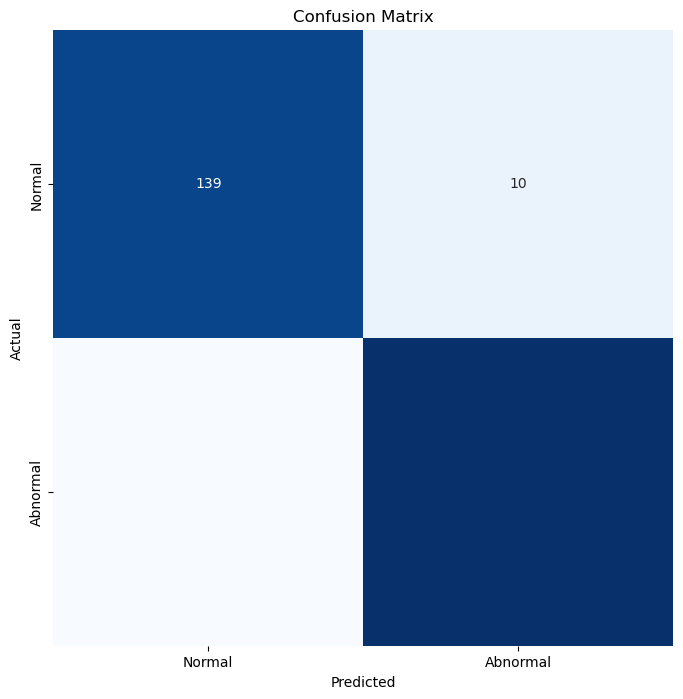

In [3]:

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xticks([0.5, 1.5], ['Normal', 'Abnormal'])
plt.yticks([0.5, 1.5], ['Normal', 'Abnormal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()